In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from plotnine import *
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Obtaining the data

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Segregate the features data from the target or label data

In [4]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df.loc[:, features].values  # or X = df.iloc[:, 0:4].values

In [5]:
y = df.loc[:, 'target'].values  # or y = df.iloc[:, 4].values

### Scale the features data using a Standard Scaler

In [6]:
X_scaled = StandardScaler().fit_transform(X)

In [7]:
pd.DataFrame(data = X_scaled, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### Create 2-D data using PCA

In [30]:
pca = PCA(n_components=2)

In [31]:
principalComponents = pca.fit_transform(X_scaled)

In [32]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [33]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [23]:
df[['target']].head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [34]:
finalDF = pd.concat([principalDf, df[['target']]], axis = 1)
finalDF.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [35]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [36]:
pca.explained_variance_ratio_.sum()

0.9580097536148199

### Visualize the 2-D Data

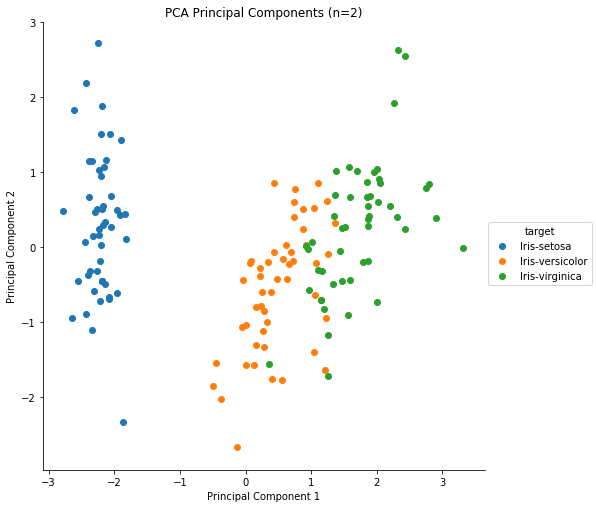

In [37]:
(sns
 .FacetGrid(finalDF, hue='target', size=7)
 .map(plt.scatter, 'principal component 1', 'principal component 2')
 .add_legend()
 .set(
    title='PCA Principal Components (n=2)',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2'
))

/home/pybokeh/envs/notebook/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/home/pybokeh/envs/notebook/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/pybokeh/envs/notebook/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


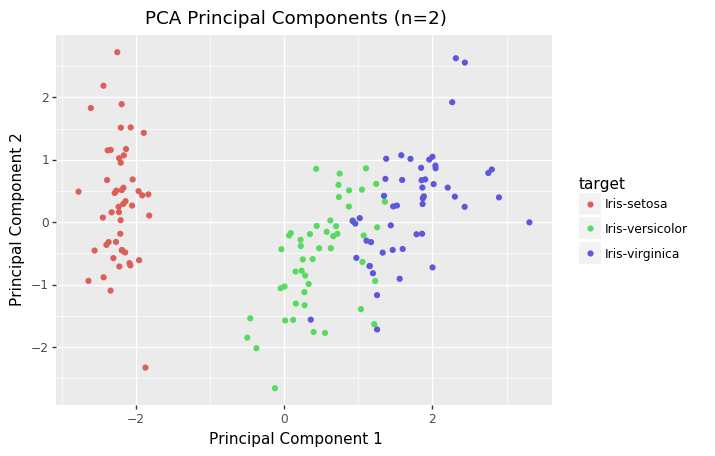

<ggplot: (8758797158755)>

In [38]:
plot = (ggplot(finalDF) + 
    aes(x = 'principal component 1', y = 'principal component 2', color = 'target') +
    geom_point() + 
    ggtitle('PCA Principal Components (n=2)') +
    xlab('Principal Component 1') +
    ylab('Principal Component 2'))
plot

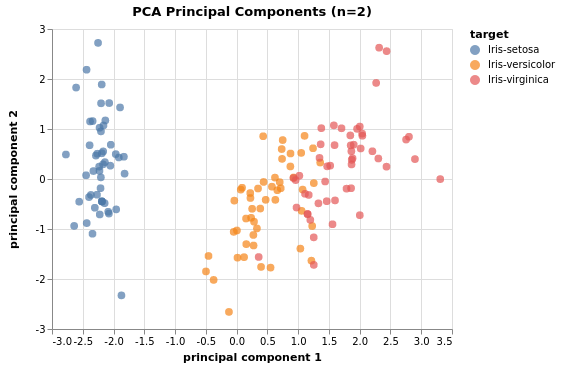

In [39]:
import altair as alt
alt.renderers.enable('notebook')

alt.Chart(finalDF, title='PCA Principal Components (n=2)').mark_circle(size=60).encode(
    x='principal component 1',
    y='principal component 2',
    color='target',
    tooltip=['target', 'principal component 1', 'principal component 2']
).interactive()